# Assignment 1: Building a Better Contact Sheet

![](./readonly/assignment1.png "")



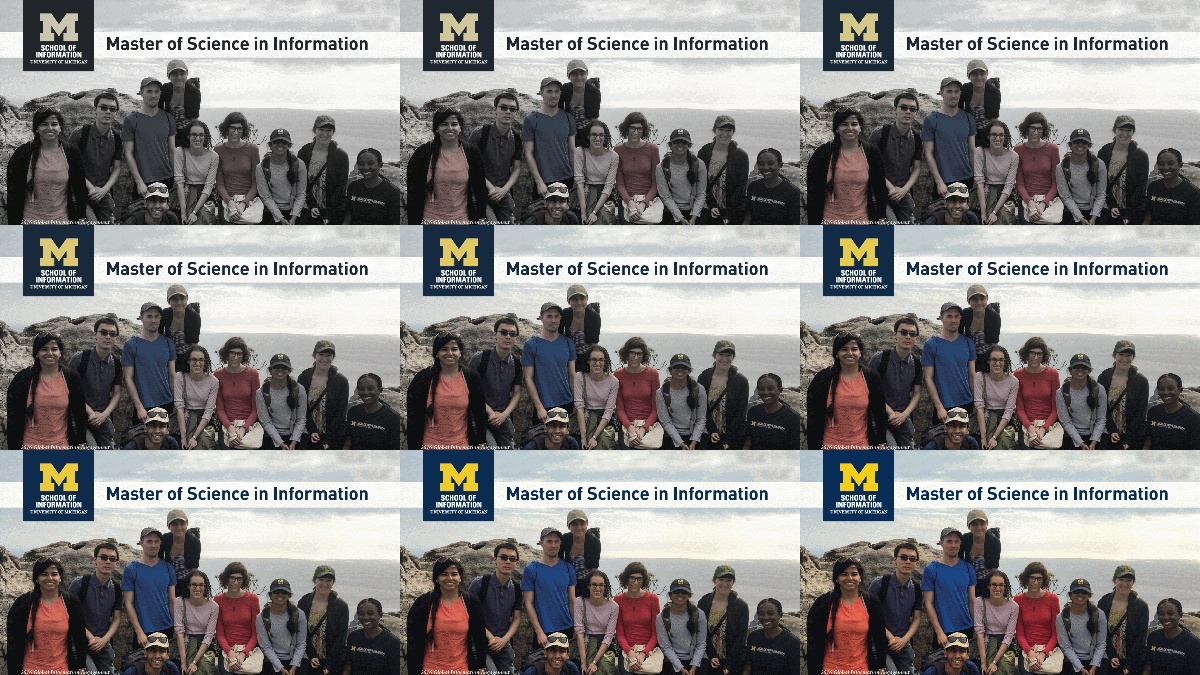

In [2]:
import PIL
from PIL import Image
from PIL import ImageEnhance

image=Image.open("readonly/msi_recruitment.gif")
image=image.convert('RGB')

enhancer=ImageEnhance.Color(image)
images=[]
for i in range(1, 10):
    images.append(enhancer.enhance(i/10))

# create a contact sheet from different brightnesses
first_image=images[0]
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
x=0
y=0

for img in images:
    
    contact_sheet.paste(img, (x, y) )
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
display(contact_sheet)

## Drawing a box with a text

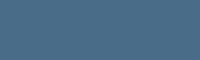

In [49]:
from PIL import Image, ImageDraw
img = Image.new('RGB',(200,60),color=(73,109,137))
display(img)

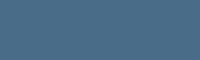

In [50]:
#Creating the text canvas
d=ImageDraw.Draw(img)
display(img)

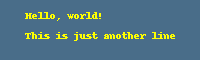

In [51]:
#Doing manipulation in the text canvas
d.text((20,10)," Hello, world!",fill=(255,255,0))
d.text((20,30)," This is just another line",fill=(255,255,0))
#img.save('pill_text.png')

display(img)

## My Take

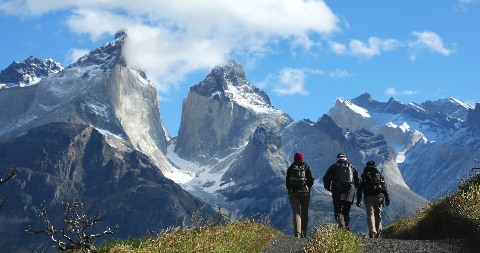

In [46]:
import PIL
from PIL import Image, ImageDraw, ImageEnhance
from IPython.display import display

#Open, convert and resize
img = Image.open("readonly/torres-del-paine.jpg")
img = img.convert('RGB')
img = img.resize((int(img.width/3), int(img.height/3)))

display(img)


### Adding text

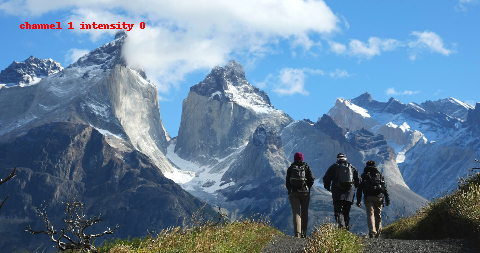

In [47]:
#creating the text layer
#text(self, xy, text, fill=None, font=None, anchor=None, *args, **kwargs)

my_text="channel {} intensity {}".format("1","0")
d = ImageDraw.Draw(img,'RGB')
d.text((20,20),my_text,fill='red')

display(img)

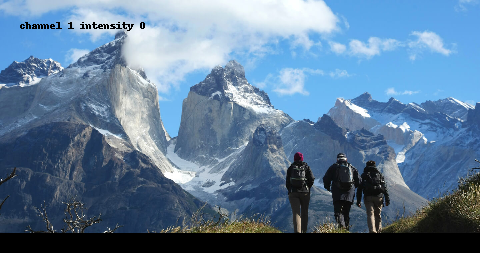

In [33]:
#Image.paste(im, box=None, mask=None)
#Where Image = {The image to be pasted on}
#      im = {the stuff to paste}
#      box =  (left,upper,right,lower))

b = Image.new('RGB',(480,20),color='black')

# Observacao: nao se pode usar paste em um objeto ImageDraw, apenas em Image. 
# d.paste(b,(0,233,480,253)) eh invalido

img.paste(b,(0,233,480,253))

display(img)

**Summarizing:**  
import libraries  
img <- open file  
resize img  
draw black background box  
create text canvas  
draw text in background box  
paste text + background into img  
display img


In [2]:
import PIL
from PIL import Image, ImageDraw

img = Image.open("readonly/torres-del-paine.jpg")
img = img.convert('RGB')
img = img.resize((int(img.width/3),int(img.height/3)))


In [58]:
box = Image.new('RGB',(480,20),color='black')

mytext="Channel 1 Intensity 0"
text_layer = ImageDraw.Draw(box,'RGB') 

text_layer.text((10,5),mytext,fill='white')
display(box)


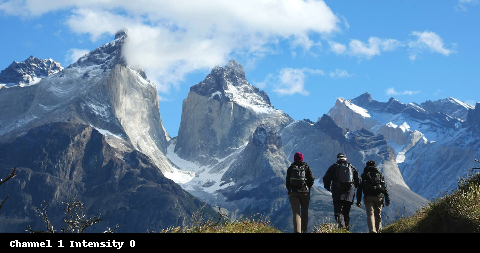

In [59]:
img.paste(box,(0,233,480,253))
display(img)

### Channel operations

Alternatives::
A) Use ImageChops module to add a filter
B) Split into channels, manipulate in HSV space, merge and convert to RGB

In [20]:
import PIL
from PIL import Image, ImageChops

img = Image.open("readonly/torres-del-paine.jpg")
img = img.convert('RGB')
img = img.resize((int(img.width/4),int(img.height/4)))

layer = Image.new('RGB', (img.size), color='red')

In [23]:
new1 = ImageChops.blend(img,layer,0.9)
new2 = ImageChops.blend(img,layer,0.5)
new3 = ImageChops.blend(img,layer,0.1)

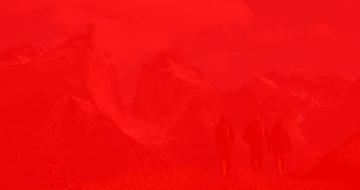

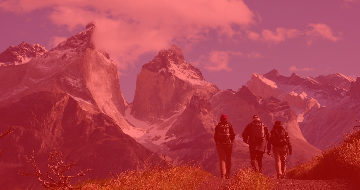

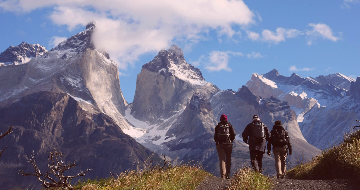

In [25]:
display(new1)
display(new2)
display(new3)

Not quite what the assignment asks for, so we need to separate the channels and change intensity of each one.

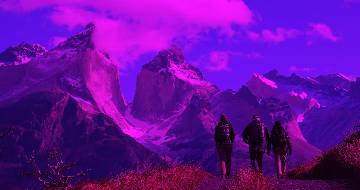

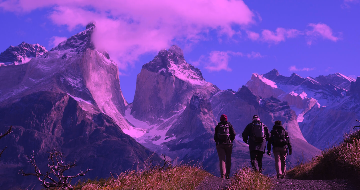

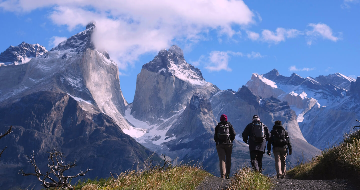

In [68]:
import PIL
from PIL import Image

img = Image.open("readonly/torres-del-paine.jpg")
img = img.convert('RGB')
img = img.resize((int(img.width/4),int(img.height/4)))
r,g,b = img.split()

g1 = g.point(lambda i: i*0.1)
g2 = g.point(lambda i: i*0.5)
g3 = g.point(lambda i: i*0.9)
out1 = Image.merge('RGB',(r,g1,b))
out2 = Image.merge('RGB',(r,g2,b))
out3 = Image.merge('RGB',(r,g3,b))
display(out1)
display(out2)
display(out3)

That's more like it!

### Putting everything together

In [102]:
import PIL
from PIL import Image

img = Image.open("readonly/torres-del-paine.jpg")
img = img.convert('RGB')
img = img.resize((int(img.width/4),int(img.height/4)))


r,g,b = img.split()

In [67]:
type(r)

PIL.Image.Image

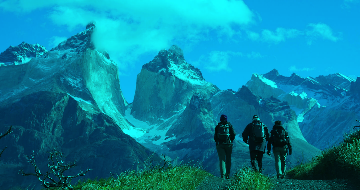

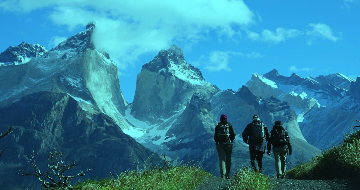

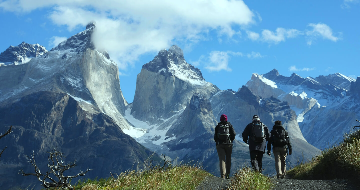

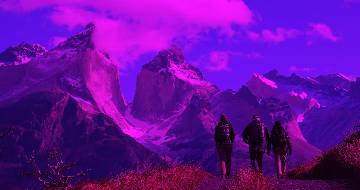

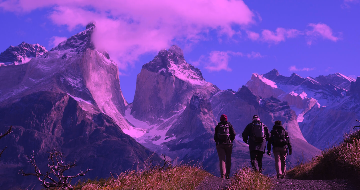

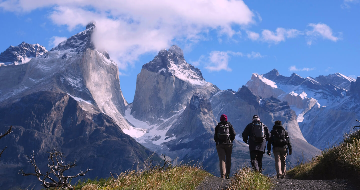

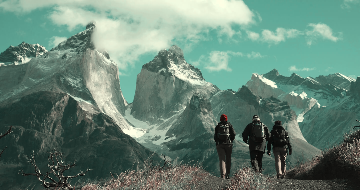

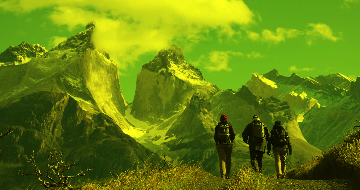

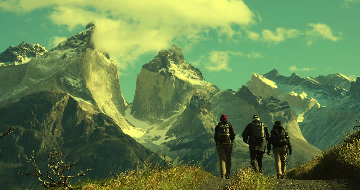

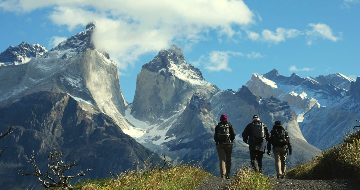

In [103]:
channels=[r,g,b]
intensity=[0.1,0.5,0.9]
buff=[]
images=[]
for ch in channels:
    for inten in intensity:
        temp = ch.copy()
        temp = temp.point(lambda i: i * inten) 
        buff.append(temp)

count=0
for j in buff:
    if count <3:
        images.append(Image.merge('RGB',(j,g,b)))
        count +=1
    elif count >= 3 and count <6:
        images.append(Image.merge('RGB',(r,j,b)))
        count +=1
    if count >=6 :
        images.append(Image.merge('RGB',(r,g,j)))
        count +=1

for k in range(len(images)):
    display(images[k])

In [ ]:
channels=[r,g,b]
intensity=[0.1,0.5,0.9]
buff=[]
images=[]
for ch in channels:
    for inten in intensity:
        temp = ch.copy()
        temp = temp.point(lambda i: i * inten) 
        buff.append(temp)

count=0
for j in buff:
    if count <3:
        images.append(Image.merge('RGB',(j,g,b)))
        count +=1
    elif count >= 3 and count <6:
        images.append(Image.merge('RGB',(r,j,b)))
        count +=1
    if count >=6 :
        images.append(Image.merge('RGB',(r,g,j)))
        count +=1

for k in range(len(images)):
    display(images[k])